# Jump height in Counter Movement Jumps
In this notebook, we show you how to calculate the jump height in counter movement jumps using the flight time. 

### Import libraries
First, we import the 'pandas' package for data wrangling and 'matplotlib' for plotting.

*Note: So called libraries or modules are a collection of additional functions that can be imported for use in your code. If they don't come preinstalled with your Python distribution you can install them for example by using conda.*

In [2]:
import pandas as pd                 # to handle data
import matplotlib.pyplot as plt     # to plot data

### Import data

Next, our data can be easily imported using pandas `read_csv()` function. We need to specify the decimal symbol to `,` and the delimiters to `;` because the defaults are `.` and `,` respectively. We set the index of our dataframe to the time, so we can access and plot our data by time, not row indices.

In [3]:
#data = pd.read_csv('data-cmj/ID1_CMJ_1.csv', decimal=',', delimiter=';')

data = pd.read_csv('data-cmj/ID1_CMJ_1.csv', decimal=',', delimiter=';', index_col='Zeit')

data

,Nr.,x1,x2,y1,y2,z1,z2,z3,z4,U1,U2
Zeit,,,,,,,,,,,
0.0005,1,0.2,0.9,-0.1,-0.1,1.6,-9.6,-4.0,10.0,-0.0061,0.0065
0.0010,2,0.2,0.5,-0.1,-0.1,1.6,-4.0,-6.8,10.0,-0.0061,0.0065
0.0015,3,0.2,0.9,-0.1,-0.1,4.4,-4.0,-6.8,4.4,-0.0061,0.0090
0.0020,4,0.2,0.9,0.2,0.2,1.6,-4.0,-4.0,10.0,-0.0061,0.0065
0.0025,5,-0.1,0.2,-0.1,0.5,1.6,-1.2,-4.0,12.8,-0.0036,0.0065
...,...,...,...,...,...,...,...,...,...,...,...
3.0975,6195,0.5,3.2,-23.4,-9.6,-88.0,-211.2,38.0,225.6,0.0367,0.2057
3.0980,6196,0.5,2.5,-23.7,-9.2,-88.0,-211.2,40.8,228.4,0.0367,0.2032
3.0985,6197,0.5,2.5,-23.4,-9.9,-88.0,-211.2,38.0,225.6,0.0342,0.2032


### Calculate vertical force 

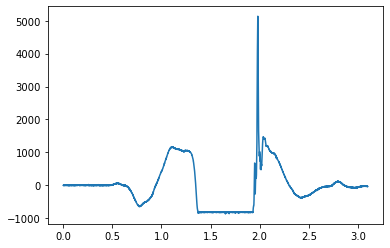

In [4]:
# Creating resultant Z force by simple additon
data['Z'] = data['z1'] + data['z2'] + data.z3 + data.z4     # different ways to access columns

# for plotting the matplotlib library is very convenient
plt.plot(data.Z)


### Get body weight

In [12]:

# find bodyweight by mean of 0.25 seconds after user clicks on graph
#plt.title('click to specify the first point from which bw is calculated')
# temp_coord = plt.ginput(1, timeout=-1)
#bw_coord = round(temp_coord[0][0], 3)   # remember the pyplot ginput() function returns a list of tuples
#plt.show()  # the pyplot show function is needed to display a plot

bw = data['Z'].rolling(20).mean().min()
bm = bw * -1 / 9.81     # for this force data bodyweight was subtracted on the forceplate, therefore the force reading is negative

print(f"weight: {round(bm,1)} kg")



weight: 83.9 kg


### Calculate flight time and jump height


In [15]:

# filters for values less than bw +10
flight_period = data.index[data.Z.lt(bw+10)]

# take first and last value
take_off = flight_period[0]  
landing = flight_period[-1] 

# flight time method to calculate jump height
ft = landing - take_off
jh = 1/8 * 9.81 * ft**2

print(f"A flight time of {round(ft,2)} s yields a jump height of {round(jh,2)} m")

0.3838656065625002
A flight time of 0.56 s yields a jump height of 0.38 m


In [5]:
# find maximum force before takeoff: idea it must be before the lowest force, therefore let's slice the data in that way
# df.min(), df.max(), df.idxmin(), df.idxmax() are functions to get minimum values and indeces in a pandas data frame
min_idx = data.Z.idxmin()
min_z = data.Z.min()
max_to = data.Z[:min_idx].max()
max_to_idx = data.Z[:min_idx].idxmax()
print(max_to)

plt.plot(data.Z)
plt.plot(min_idx, min_z, '*r')  # defining a color and shape of a single data point in a plot
plt.plot(max_to_idx, max_to, '*k')
plt.xticks([0.000, 1.5, 3])



1165.6
